In [8]:
#from google.colab import drive

In [9]:
#drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [11]:
#from google.colab import drive
#drive.mount('/content/drive')

In [12]:
#df = pd.read_csv("drive/MyDrive/Business Analytics/Project/train.csv")

In [2]:
df = pd.read_csv("/Users/noahjakel/BusinessAnalytics/train.csv")

In [14]:
#df = pd.read_csv("drive/MyDrive/DataScience Applications/Capstone Project/Competition DataSet/train.csv")

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.drop(["Id","MiscVal", "PoolQC", "Alley","MiscFeature"], axis = 1, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [6]:
df[["Fence", "FireplaceQu", "Fireplaces"]]

Fence FireplaceQu  Fireplaces
0       NaN         NaN           0
1       NaN          TA           1
2       NaN          TA           1
3       NaN          Gd           1
4       NaN          TA           1
...     ...         ...         ...
1455    NaN          TA           1
1456  MnPrv          TA           2
1457  GdPrv          Gd           2
1458    NaN         NaN           0
1459    NaN         NaN           0

[1460 rows x 3 columns]

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <BarContainer object of 10 artists>)

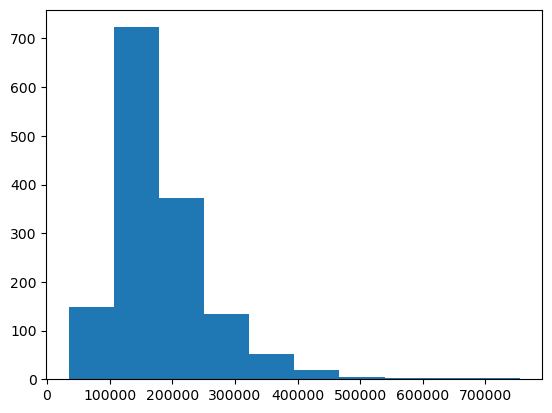

In [7]:
plt.hist(df["SalePrice"])

In [8]:
df.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.000000   
max    1418.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MoSold       YrSold      SalePrice  
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  
mean     15.060959     2.758904     6.321918  2007.815753  180921.195890  
std      55.757415    40.177307     2.703626     1.328095   79442.502883  
min       0.000000     0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000     0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000     0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000     0.000000     8.000000  2009.000000  214000.000000  
max     480.000000   738.000000    12.000000  2010.000000  755000.000000  

[8 rows x 36 columns]

In [9]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [10]:
df["CentralAir"].dtypes

dtype('O')

In [11]:
numeric_features = []
cat_features = []
for col in df.drop("SalePrice", axis = 1).columns:
  if df[col].dtypes != df["CentralAir"].dtypes:
    numeric_features.append(col)
  else:
      cat_features.append(col)


In [12]:
numeric_features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 'YrSold']

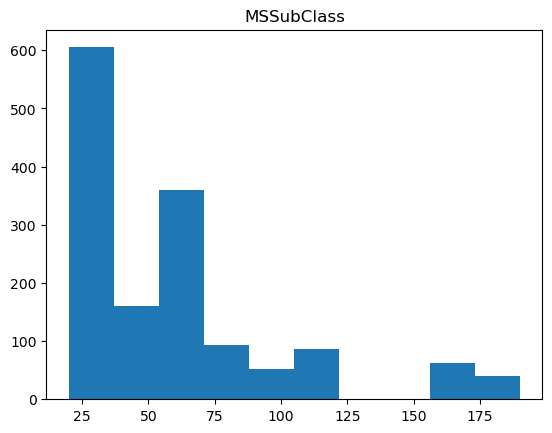

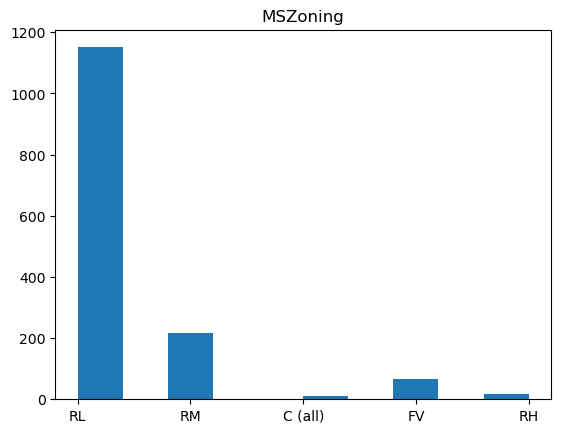

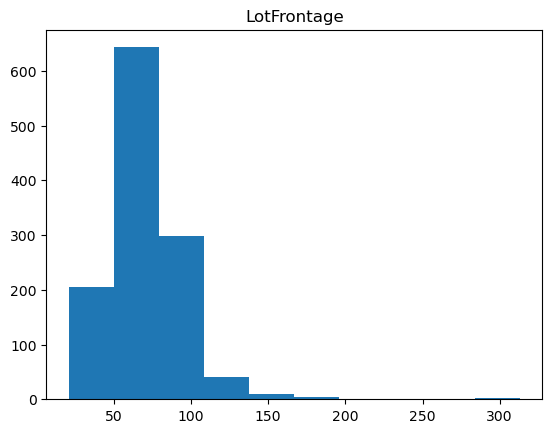

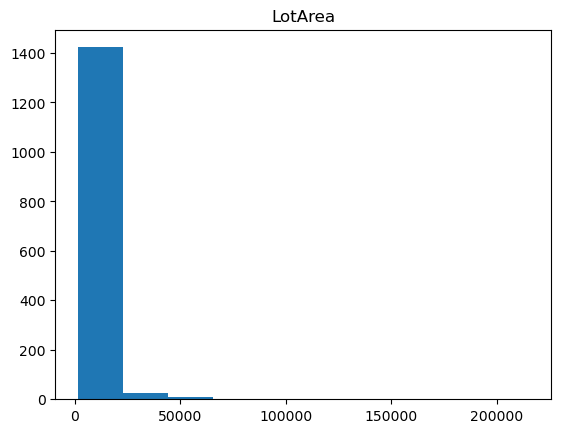

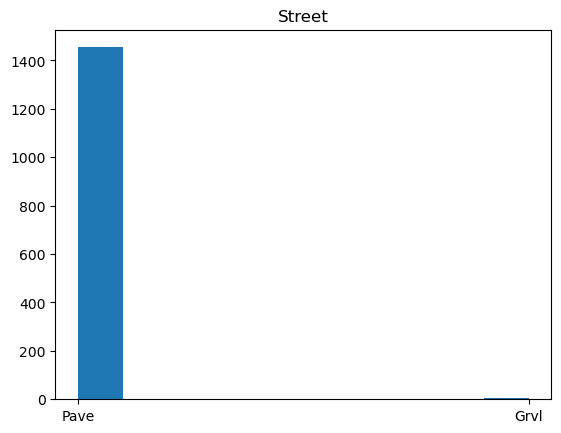

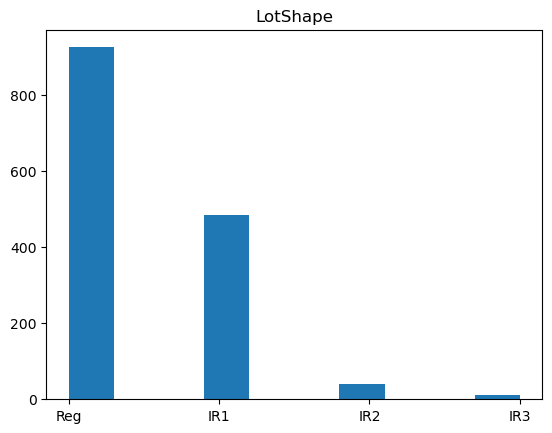

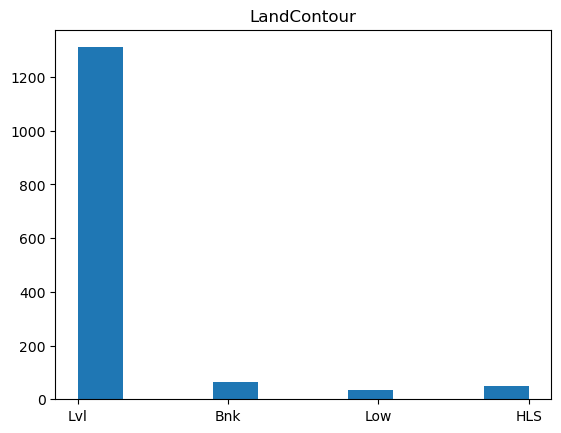

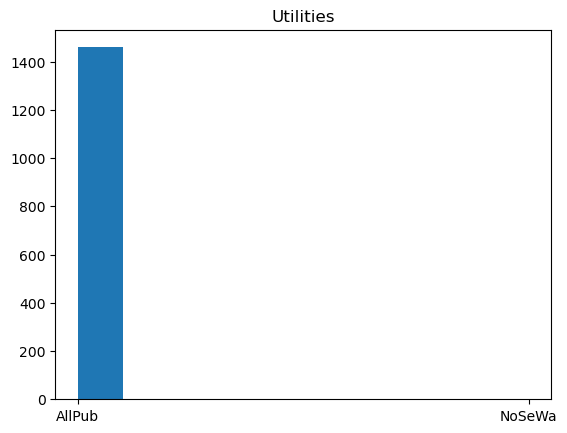

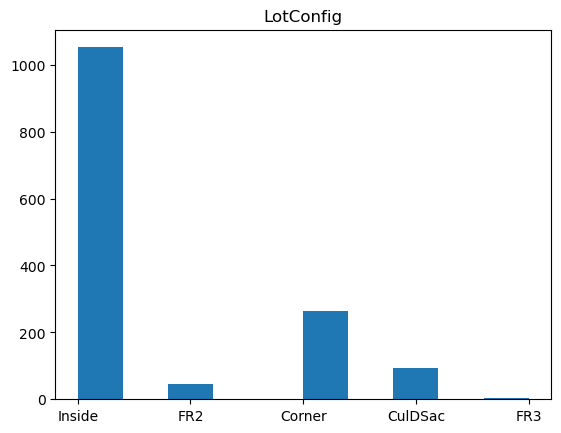

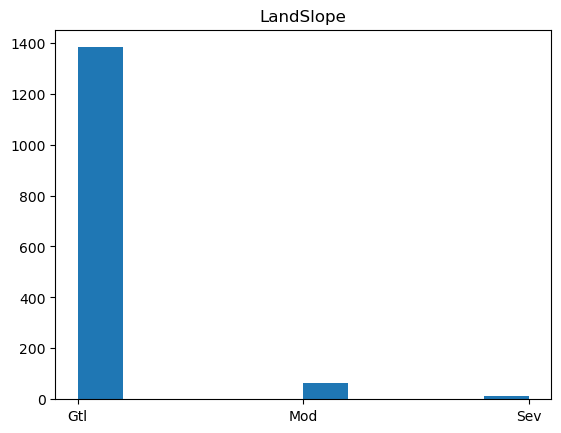

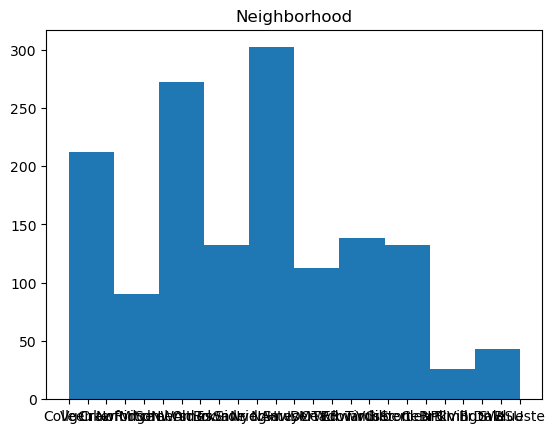

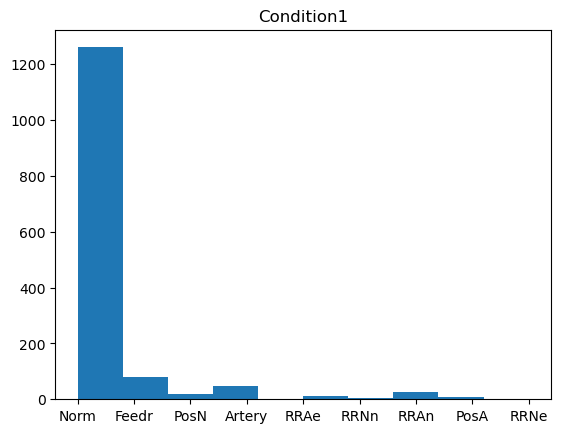

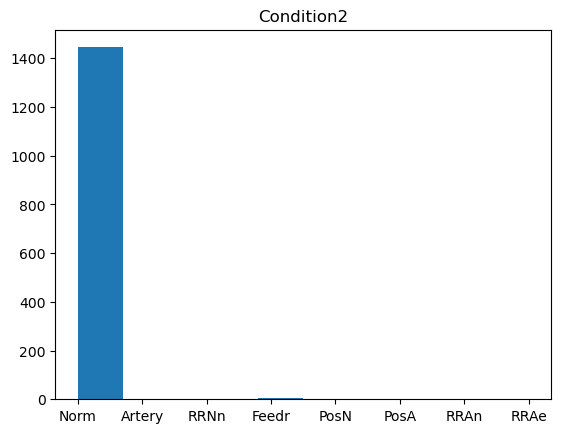

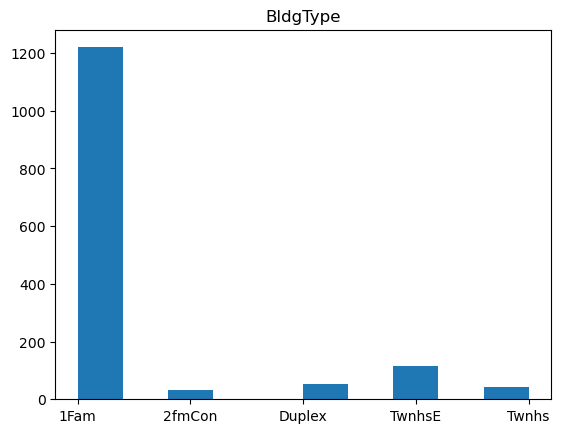

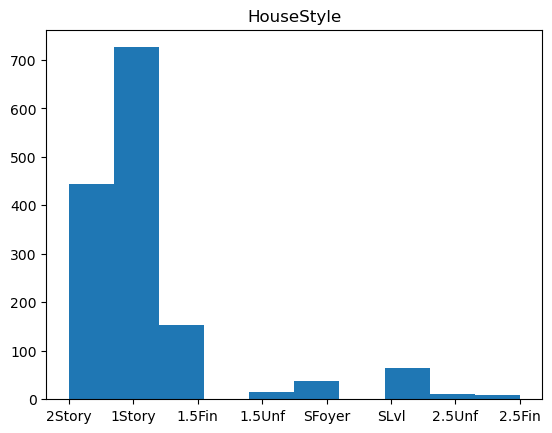

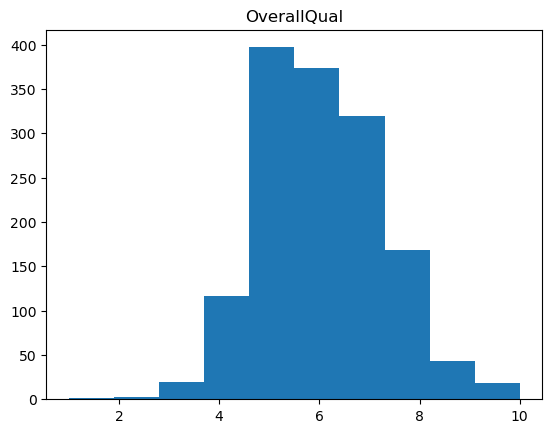

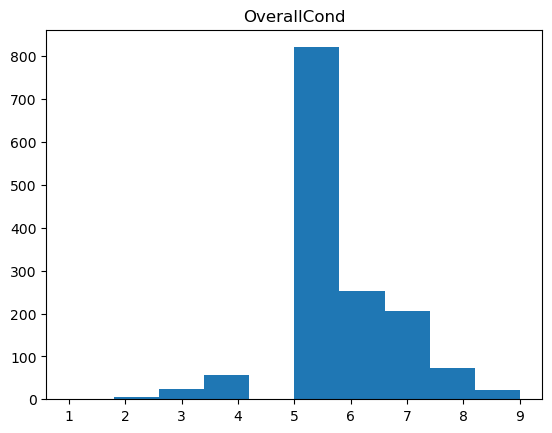

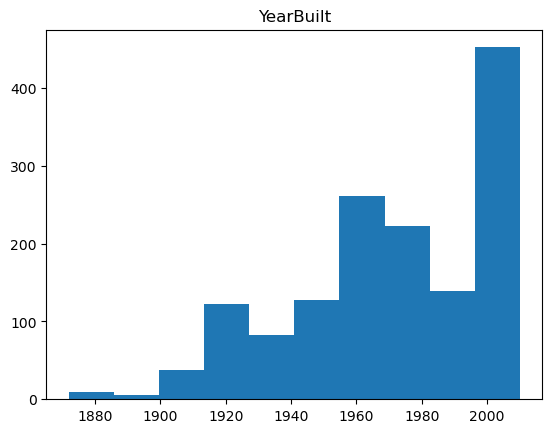

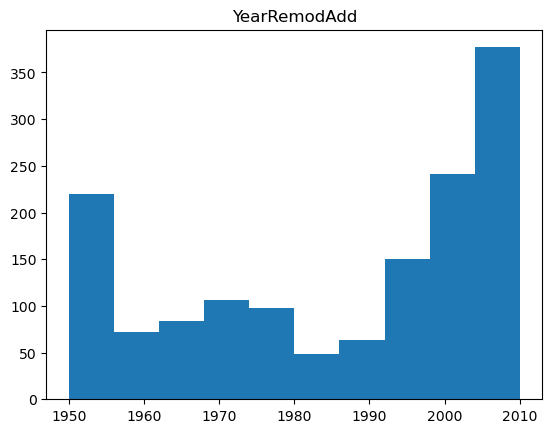

In [25]:
for nf in df.columns[0:19]:
  plt.figure()
  plt.hist(df[nf])
  plt.title(nf)
  plt.show

In [26]:
#for nf in df.columns[19:39]:
#  plt.figure()
#  plt.hist(df[nf])
#  plt.title(nf)
#  plt.show

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

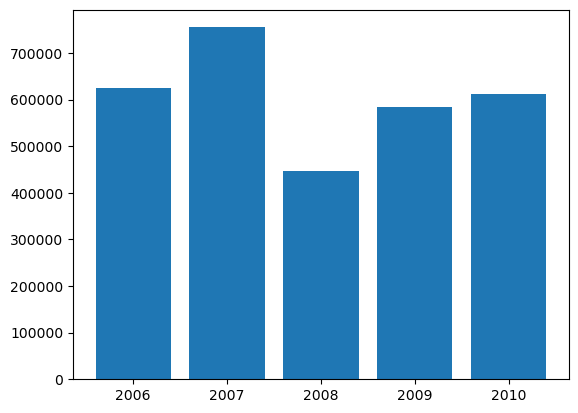

In [14]:
plt.bar(df["YrSold"], df["SalePrice"])
plt.show()

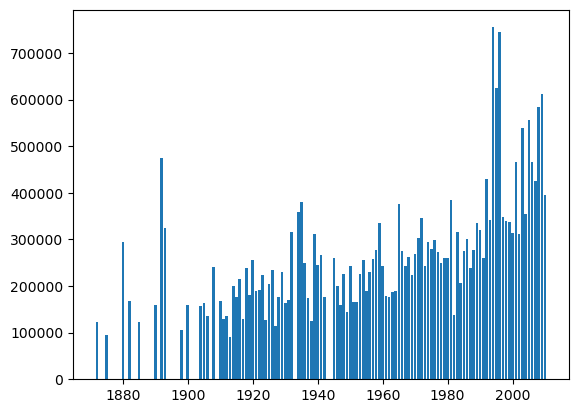

In [15]:
plt.bar(df["YearBuilt"], df["SalePrice"])
plt.show()

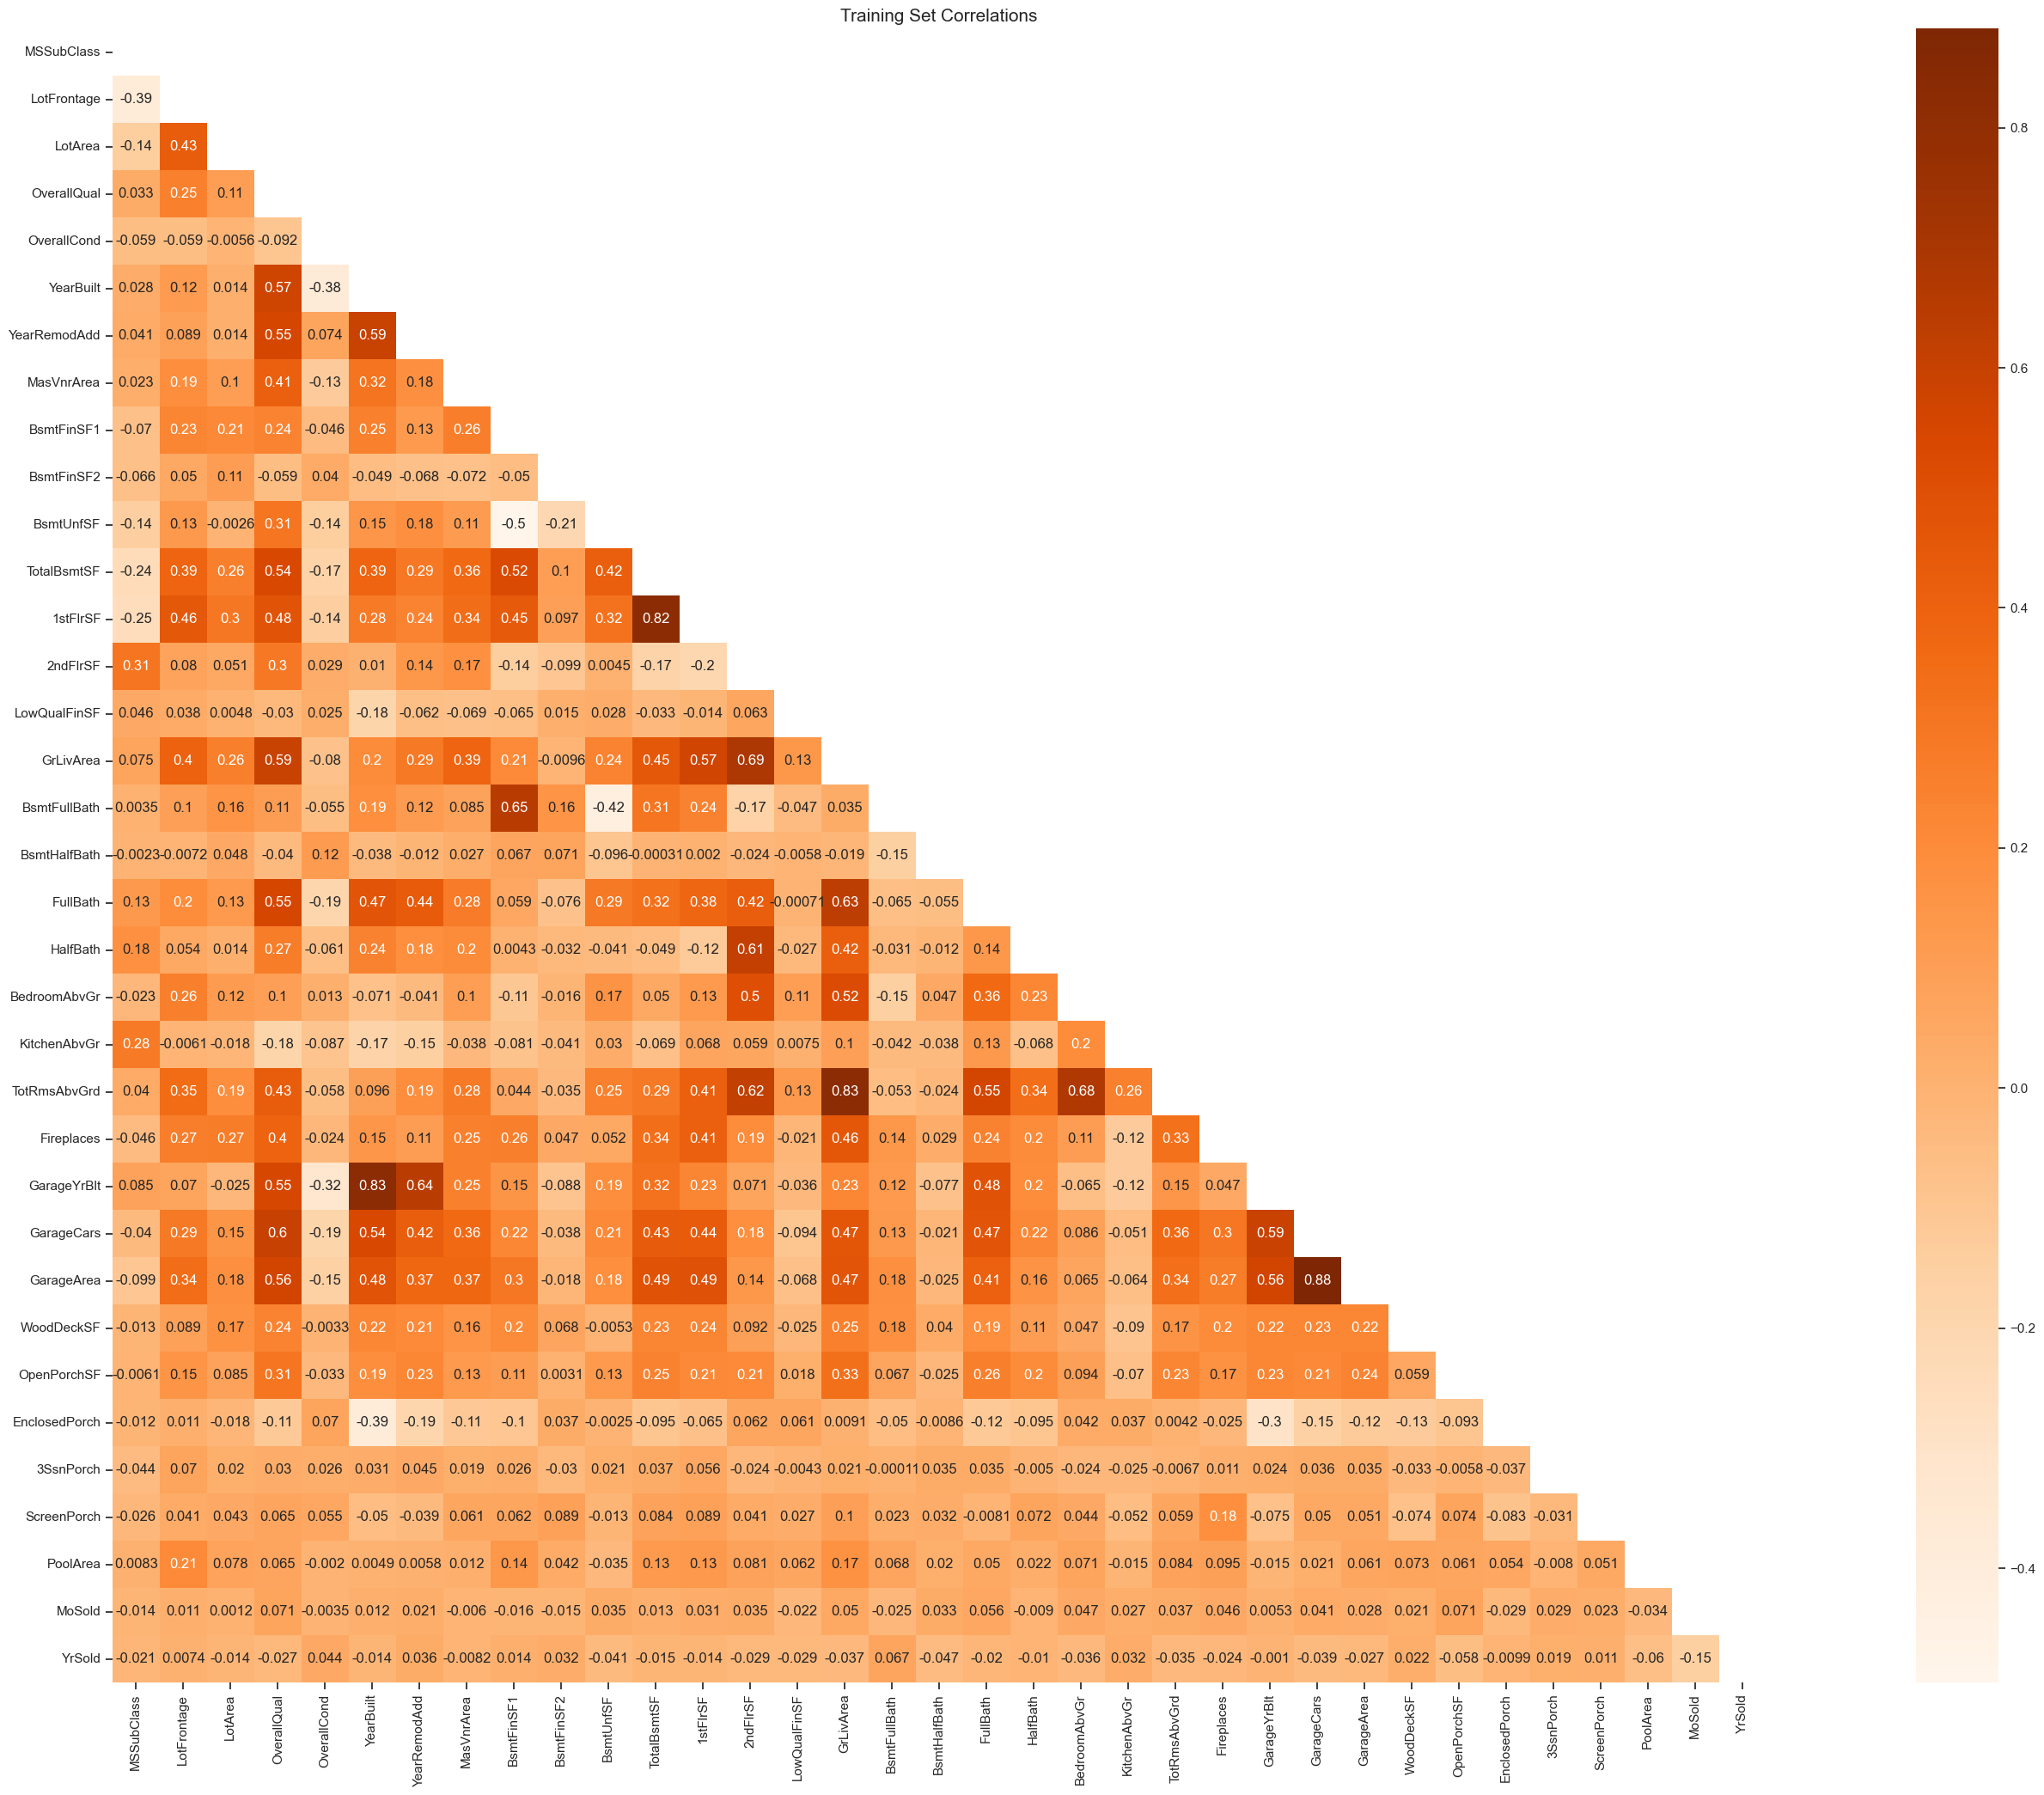

In [30]:
#taken from https://www.kaggle.com/code/vshantam/house-prices-prediction
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#Correaltion Matrix for numerical features
sns.set_theme(style="ticks")
# Generate a large random dataset
corr = df[numeric_features].corr()
rs = np.random.RandomState(33)
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, axs = plt.subplots(figsize=(45, 25))
sns.heatmap(corr , annot=True, square=True, mask=mask,  cmap="Oranges")
plt.title('Training Set Correlations', size=15)
plt.show()

##Imputation

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [17]:
df["Fence"].isna().sum()

1179

In [18]:
#All NA
z = []
for x in df.columns:
  if df[x].isna().sum() > 0:
    print(x, df[x].isna().sum()/ 1460)
    z.append(x)

LotFrontage 0.1773972602739726
MasVnrType 0.005479452054794521
MasVnrArea 0.005479452054794521
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinType2 0.026027397260273973
Electrical 0.0006849315068493151
FireplaceQu 0.4726027397260274
GarageType 0.05547945205479452
GarageYrBlt 0.05547945205479452
GarageFinish 0.05547945205479452
GarageQual 0.05547945205479452
GarageCond 0.05547945205479452
Fence 0.8075342465753425


In [19]:
#Numerical NA
zN = []
for x in numeric_features:
  if df[x].isna().sum() > 0:
    print(x, df[x].isna().sum()/ 1460)
    zN.append(x)

LotFrontage 0.1773972602739726
MasVnrArea 0.005479452054794521
GarageYrBlt 0.05547945205479452


In [20]:
zN

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [21]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop("SalePrice", axis = 1)
y = df["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [24]:
imputer = KNNImputer()
imputer.fit(X_train[zN])
X_train_imputed = imputer.transform(X_train[zN])
names = imputer.feature_names_in_
X_train_imputed = pd.DataFrame(X_train_imputed, columns=names, index = X_train.index)

In [25]:
imputer_test = KNNImputer()
imputer.fit(X_test[zN])
X_test_imputed = imputer.transform(X_test[zN])
names_test = imputer.feature_names_in_
X_test_imputed = pd.DataFrame(X_test_imputed, columns=names_test, index = X_test.index)

In [26]:
X_train_imputed

LotFrontage  MasVnrArea  GarageYrBlt
632          85.0       209.0       1977.0
208          63.8       128.0       1988.0
83           80.0        66.0       1974.0
1174         80.0         0.0       1932.0
250          55.0         0.0       1977.4
...           ...         ...          ...
715          78.0       174.0       1974.0
905          80.0       110.0       1954.0
1096         60.0         0.0       1954.2
235          21.0       604.0       1971.0
1061        120.0         0.0       1994.0

[1022 rows x 3 columns]

In [27]:
for j in zN:
  X_train[j] = X_train_imputed[j]
  X_test[j] = X_test_imputed[j]

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 632 to 1061
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1022 non-null   int64  
 1   MSZoning       1022 non-null   object 
 2   LotFrontage    1022 non-null   float64
 3   LotArea        1022 non-null   int64  
 4   Street         1022 non-null   object 
 5   LotShape       1022 non-null   object 
 6   LandContour    1022 non-null   object 
 7   Utilities      1022 non-null   object 
 8   LotConfig      1022 non-null   object 
 9   LandSlope      1022 non-null   object 
 10  Neighborhood   1022 non-null   object 
 11  Condition1     1022 non-null   object 
 12  Condition2     1022 non-null   object 
 13  BldgType       1022 non-null   object 
 14  HouseStyle     1022 non-null   object 
 15  OverallQual    1022 non-null   int64  
 16  OverallCond    1022 non-null   int64  
 17  YearBuilt      1022 non-null   int64  
 18  YearRe

In [29]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 258 to 529
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     438 non-null    int64  
 1   MSZoning       438 non-null    object 
 2   LotFrontage    438 non-null    float64
 3   LotArea        438 non-null    int64  
 4   Street         438 non-null    object 
 5   LotShape       438 non-null    object 
 6   LandContour    438 non-null    object 
 7   Utilities      438 non-null    object 
 8   LotConfig      438 non-null    object 
 9   LandSlope      438 non-null    object 
 10  Neighborhood   438 non-null    object 
 11  Condition1     438 non-null    object 
 12  Condition2     438 non-null    object 
 13  BldgType       438 non-null    object 
 14  HouseStyle     438 non-null    object 
 15  OverallQual    438 non-null    int64  
 16  OverallCond    438 non-null    int64  
 17  YearBuilt      438 non-null    int64  
 18  YearRemo

numerical features successfully imputed!

In [30]:
#string na's
z = []
for x in X.columns:
  if X[x].isna().sum() > 0:
    print(x, df[x].isna().sum()/ 1460)
    z.append(x)

LotFrontage 0.1773972602739726
MasVnrType 0.005479452054794521
MasVnrArea 0.005479452054794521
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinType2 0.026027397260273973
Electrical 0.0006849315068493151
FireplaceQu 0.4726027397260274
GarageType 0.05547945205479452
GarageYrBlt 0.05547945205479452
GarageFinish 0.05547945205479452
GarageQual 0.05547945205479452
GarageCond 0.05547945205479452
Fence 0.8075342465753425


In [31]:
X_train["MasVnrType"].mode()[0]

'None'

In [32]:
for j in z:
  X_train[j] = X_train[j].fillna(value=X_train[j].mode()[0])
  X_test[j] = X_test[j].fillna(value=X_test[j].mode()[0])

In [33]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 258 to 529
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     438 non-null    int64  
 1   MSZoning       438 non-null    object 
 2   LotFrontage    438 non-null    float64
 3   LotArea        438 non-null    int64  
 4   Street         438 non-null    object 
 5   LotShape       438 non-null    object 
 6   LandContour    438 non-null    object 
 7   Utilities      438 non-null    object 
 8   LotConfig      438 non-null    object 
 9   LandSlope      438 non-null    object 
 10  Neighborhood   438 non-null    object 
 11  Condition1     438 non-null    object 
 12  Condition2     438 non-null    object 
 13  BldgType       438 non-null    object 
 14  HouseStyle     438 non-null    object 
 15  OverallQual    438 non-null    int64  
 16  OverallCond    438 non-null    int64  
 17  YearBuilt      438 non-null    int64  
 18  YearRemo

In [34]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 632 to 1061
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1022 non-null   int64  
 1   MSZoning       1022 non-null   object 
 2   LotFrontage    1022 non-null   float64
 3   LotArea        1022 non-null   int64  
 4   Street         1022 non-null   object 
 5   LotShape       1022 non-null   object 
 6   LandContour    1022 non-null   object 
 7   Utilities      1022 non-null   object 
 8   LotConfig      1022 non-null   object 
 9   LandSlope      1022 non-null   object 
 10  Neighborhood   1022 non-null   object 
 11  Condition1     1022 non-null   object 
 12  Condition2     1022 non-null   object 
 13  BldgType       1022 non-null   object 
 14  HouseStyle     1022 non-null   object 
 15  OverallQual    1022 non-null   int64  
 16  OverallCond    1022 non-null   int64  
 17  YearBuilt      1022 non-null   int64  
 18  YearRe

##Random Forest

In [35]:
cat_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition']

In [37]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder=OneHotEncoder()
enc_data=onehotencoder.fit(X[cat_features])

enc_data_train= pd.DataFrame(onehotencoder.transform(X_train[cat_features]).toarray())
enc_data_test=pd.DataFrame(onehotencoder.transform(X_test[cat_features]).toarray())
X_train=X_train[numeric_features].reset_index().join(enc_data_train)
X_test=X_test[numeric_features].reset_index().join(enc_data_test)

KeyError: "None of [Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',\n       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',\n       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',\n       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',\n       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',\n       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',\n       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',\n       'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],\n      dtype='object')] are in the [columns]"

In [39]:
pd.set_option('display.max_columns', None)
X_test.head()

index  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0    258          60         80.0    12435            7            5   
1    267          75         60.0     8400            5            8   
2    288          20         78.0     9819            5            5   
3    649         180         21.0     1936            4            6   
4   1233          20         81.6    12160            5            5   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0       2001          2001       172.0         361           0        602   
1       1939          1997         0.0         378           0        342   
2       1967          1967        31.0         450           0        432   
3       1970          1970         0.0         131         499          0   
4       1959          1959       180.0        1000           0        188   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0          963       963       829             0       1792             0   
1          720      1052       720           420       2192             0   
2          882       900         0             0        900             0   
3          630       630         0             0        630             1   
4         1188      1188         0             0       1188             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             7   
1             0         2         1             4             1             8   
2             0         1         0             3             1             5   
3             0         1         0             1             1             3   
4             0         1         0             3             1             6   

   Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0           1       2001.0           2         564           0           96   
1           1       1939.0           1         240         262           24   
2           0       1970.0           1         280           0            0   
3           0       1962.0           0           0           0            0   
4           0       1959.0           2         531           0            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MoSold  YrSold    0    1  \
0              0        245            0         0       5    2008  0.0  0.0   
1              0          0            0         0       7    2008  0.0  0.0   
2              0          0            0         0       2    2010  0.0  0.0   
3              0          0            0         0      12    2007  0.0  0.0   
4              0          0            0         0       5    2010  0.0  0.0   

     2    3    4    5    6    7    8    9   10   11   12   13   14   15   16  \
0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0   
1  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
2  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   
3  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0   
4  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0   

    17   18   19   20   21   22   23   24   25   26   27   28   29   30   31  \
0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   
1  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    32   33   34   35   36   37   38   39   40   41   42   43   44   45   46  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   

In [52]:
#!pip install lazypredict

In [53]:
#feature_x = X_train.append(X_test)
#feature_y = y_train.append(y_test)

In [54]:
from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()

#sc.fit(feature_x)
#feature_x = sc.transform(feature_x)
#feature_x_test = sc.transform(X_test)

In [55]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np


#X, y = shuffle(feature_x, feature_y, random_state=13)
#X = X.astype(np.float32)
#offset = int(X.shape[0] * 0.9)
#X_train, y_train = X[:offset], y[:offset]
#X_test, y_test = X[offset:], y[offset:]
#reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
#models,predictions = reg.fit(X_train, X_test, y_train, y_test)

OSError: dlopen(/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)

In [ ]:
models

Seems that Poisson Regressor will be best lets try it

##Random Forest

In [40]:
# 1) Import Model functions
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# 2) Define X and y

# 3) Define Train and Test Data


# 3) Instantiate Model
model  = RandomForestRegressor()

# 4) Fit Model to Data
reg = model.fit(X_train,y_train)

# 5) Interpret Results
print("R2 on train: ", reg.score(X_train, y_train))

# 6) Evaluate Generalization Performance
y_pred=model.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


R2 on train:  0.9765058262420876
RMSE: 25087.541552297364
MAPE: 0.11454735804215048


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [41]:
print("R2 on test: ", reg.score(X_test, y_test))

R2 on test:  0.9118546150256334


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


R2 on test:  0.9019783615619004

R2 on train:  0.9737773136158271

RMSE: 27066.6560186435

MAPE: 0.11389873237641256

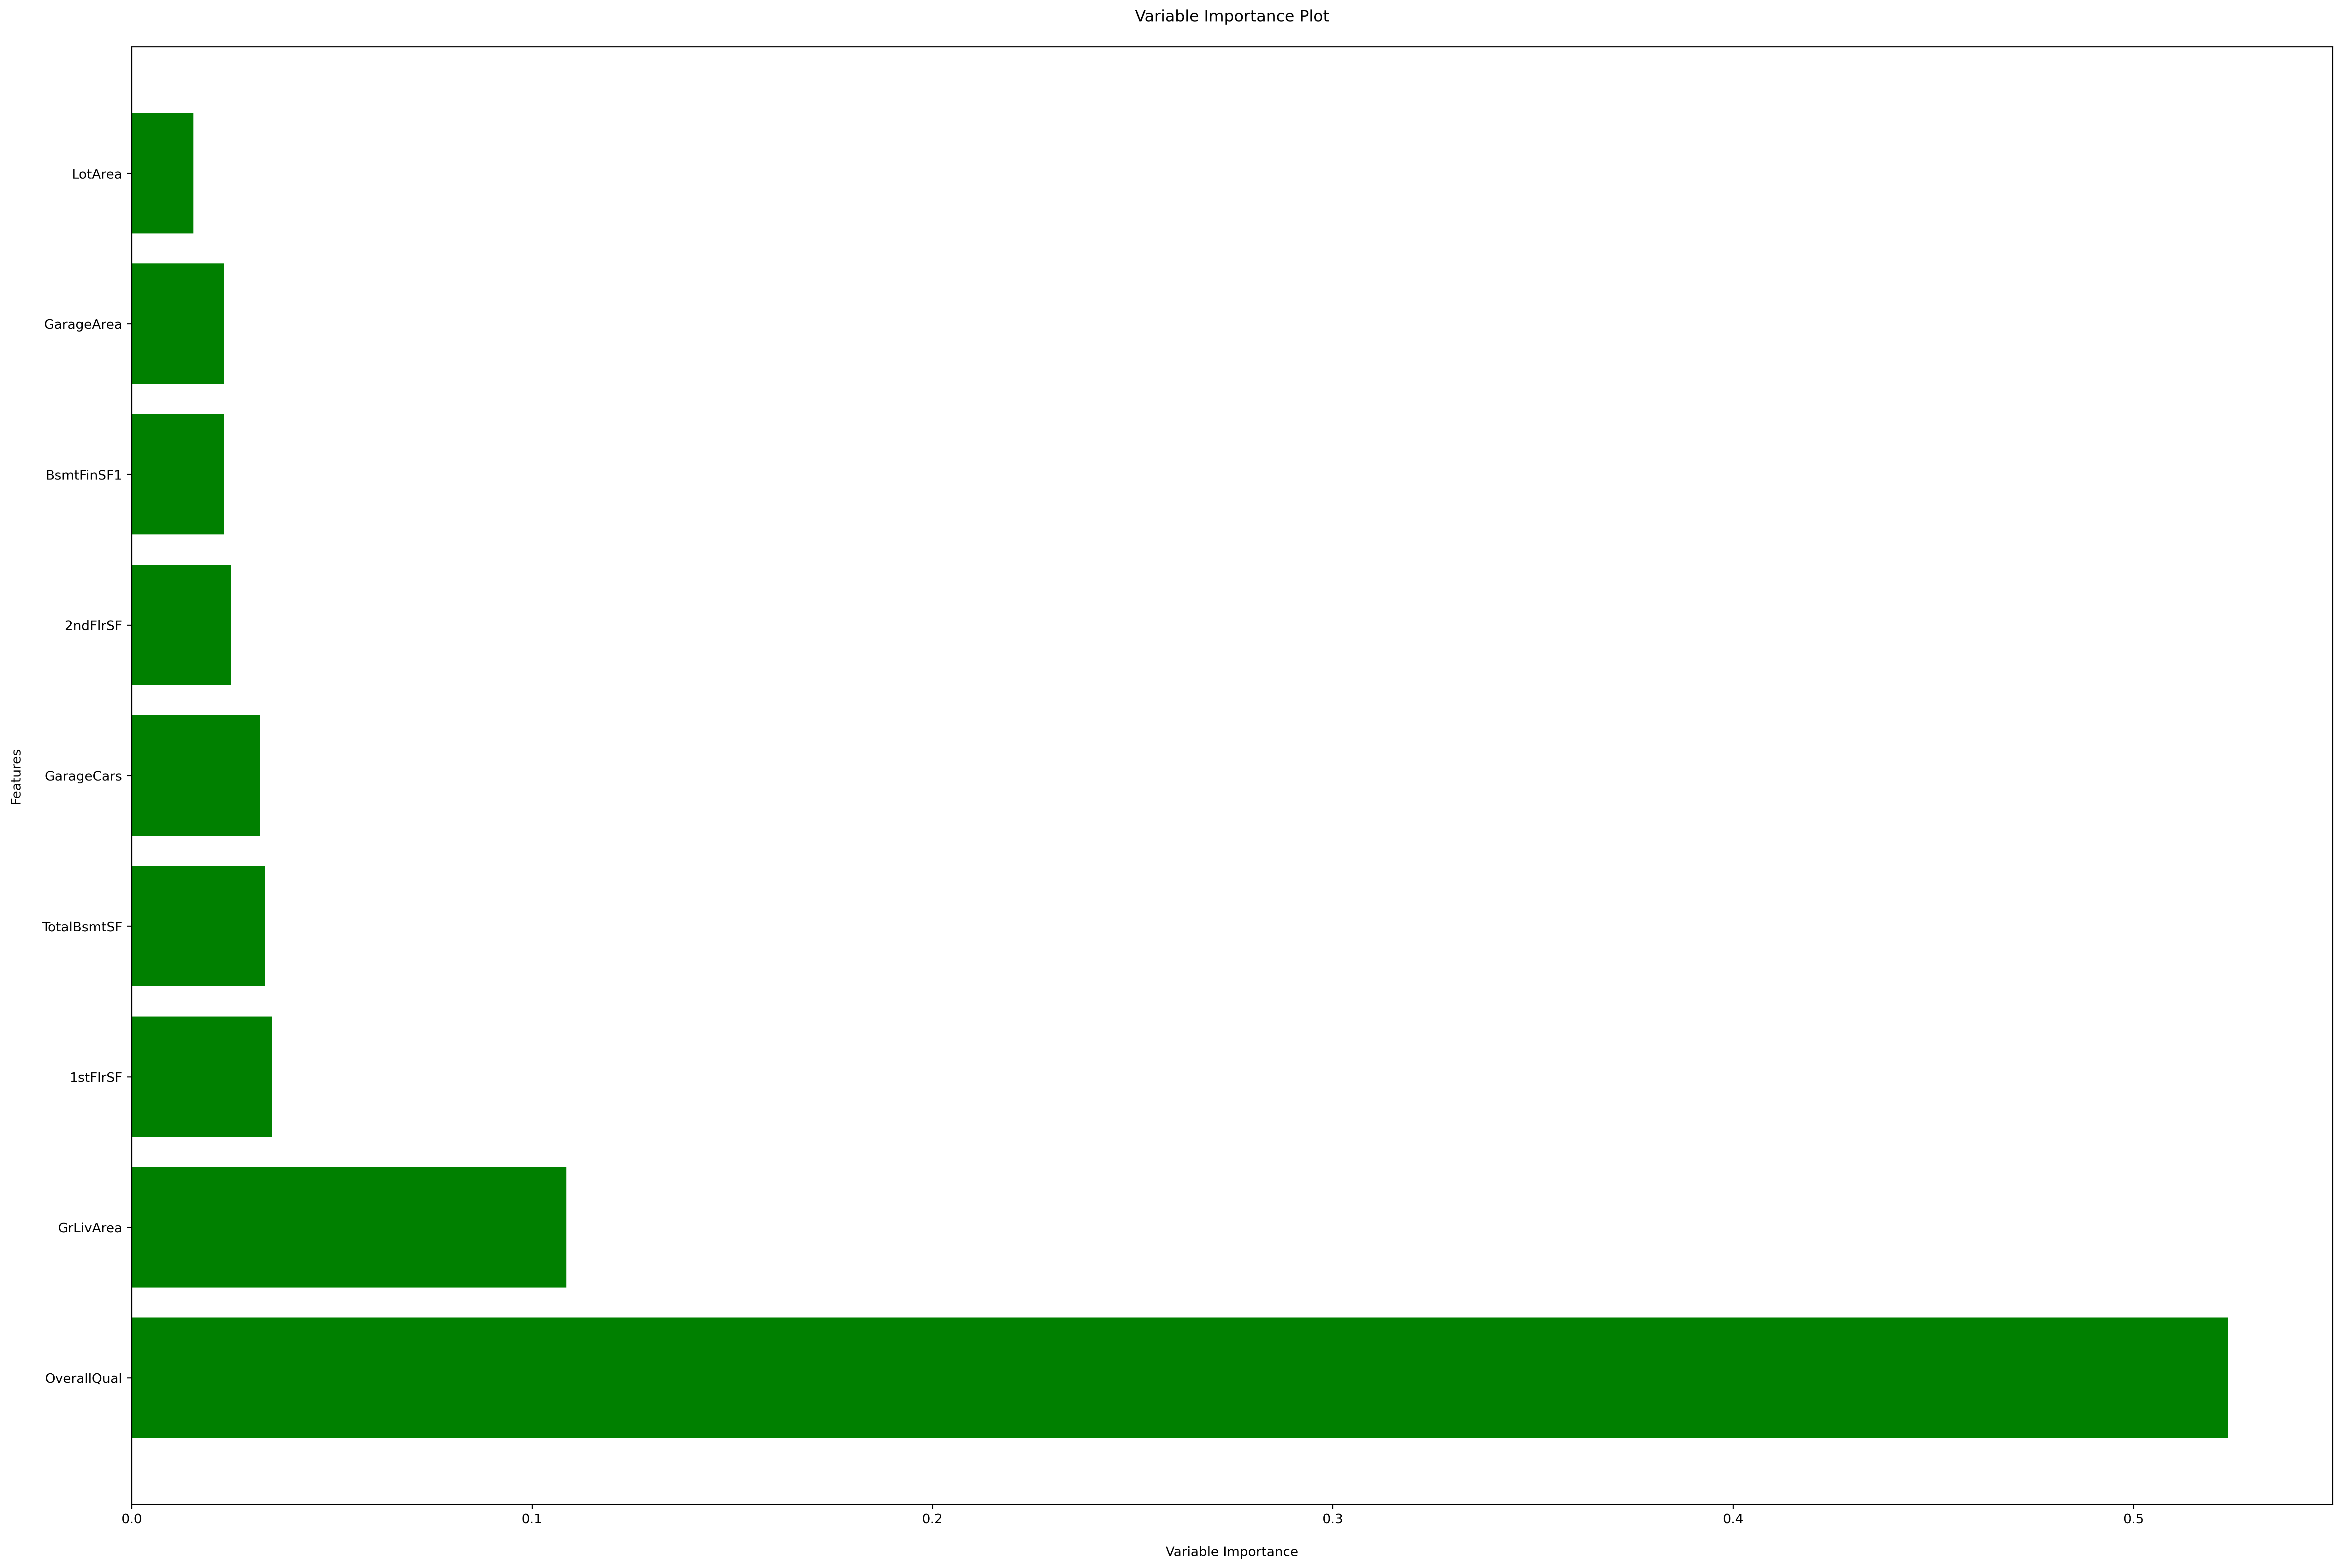

In [42]:
import matplotlib.pyplot as plt
from pandas import DataFrame
imp=DataFrame({"imp":model.feature_importances_, "names":X_train.columns}).sort_values("imp", ascending=False)
fig, ax = plt.subplots(figsize=(30,20), dpi=300) 
ax.barh(imp.head(9)["names"],imp.head(9)["imp"], color="green") 
ax.set_xlabel('\nVariable Importance')
ax.set_ylabel('Features\n') 
ax.set_title('Variable Importance Plot\n') 
plt.show() 

In [43]:
imp.head(9)

imp        names
4   0.523558  OverallQual
16  0.108619    GrLivArea
13  0.035025     1stFlrSF
12  0.033345  TotalBsmtSF
26  0.032073   GarageCars
14  0.024790     2ndFlrSF
9   0.023119   BsmtFinSF1
27  0.023090   GarageArea
3   0.015459      LotArea

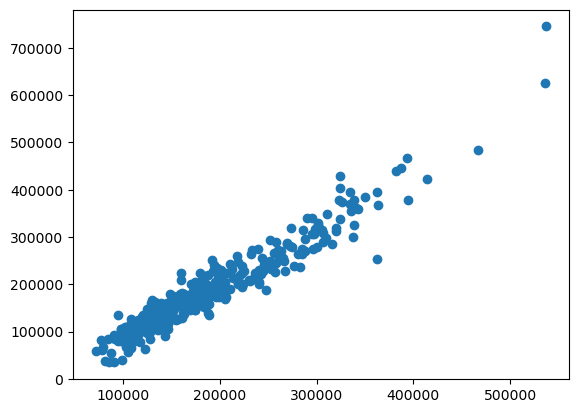

In [44]:
plt.scatter(y_pred, y_test)

Es zeigt sich prediction ist nicht gut für outliers, diese könnte man droppen um besser zu werden

In [61]:
import pickle
pickle.dump(reg, open('model.pkl', 'wb'))

In [45]:
##Model with only 5 most influential variables to provide user friendliness
X_train_red = X_train[["OverallQual", "GarageCars", "GrLivArea", "TotalBsmtSF", "BsmtFinSF1"]]
X_test_red = X_test[["OverallQual", "GarageCars", "GrLivArea", "TotalBsmtSF", "BsmtFinSF1"]]

In [46]:
model_red  = RandomForestRegressor()

# 4) Fit Model to Data
reg_red = model_red.fit(X_train_red, y_train)

# 5) Interpret Results
print("R2 on train: ", reg_red.score(X_train_red, y_train))

# 6) Evaluate Generalization Performance
y_pred_red = model_red.predict(X_test_red)
print("RMSE:", mean_squared_error(y_test, y_pred_red, squared=False))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred_red))
print("R2 on test: ", reg_red.score(X_test_red, y_test))
print("-"*37)
print("VERÄNDERUNGEN ABSOLUT")
print("RMSE:", mean_squared_error(y_test, y_pred_red, squared=False)
      - mean_squared_error(y_test, y_pred, squared=False))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred_red)
      - mean_absolute_percentage_error(y_test, y_pred))
print("R2 on test: ", reg_red.score(X_test_red, y_test)
      - reg.score(X_test, y_test))
print("-"*37)
print("VERÄNDERUNGEN PROZENTUAL")
print("RMSE:", mean_squared_error(y_test, y_pred_red, squared=False)
      / mean_squared_error(y_test, y_pred, squared=False) - 1)
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred_red)
      / mean_absolute_percentage_error(y_test, y_pred) - 1)
print("R2 on test: ", reg_red.score(X_test_red, y_test)
      / reg.score(X_test, y_test) - 1)

R2 on train:  0.9727784842681816
RMSE: 27420.725703692347
MAPE: 0.1347036576013002
R2 on test:  0.8946968753580894
-------------------------------------
VERÄNDERUNGEN ABSOLUT
RMSE: 2333.184151394984
MAPE: 0.02015629955914973
R2 on test:  -0.01715773966754397
-------------------------------------
VERÄNDERUNGEN PROZENTUAL
RMSE: 0.09300170550913656
MAPE: 0.17596477041166447
R2 on test:  -0.0188163106100655


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [64]:
##Overall keine schlimme Performanceverschlechterung, mit 5 Variablen ist ein Input via Website direkt möglich,
##Prediction is still pretty accurate
##NextSteps, Hyperparameter tuning and cross-validation

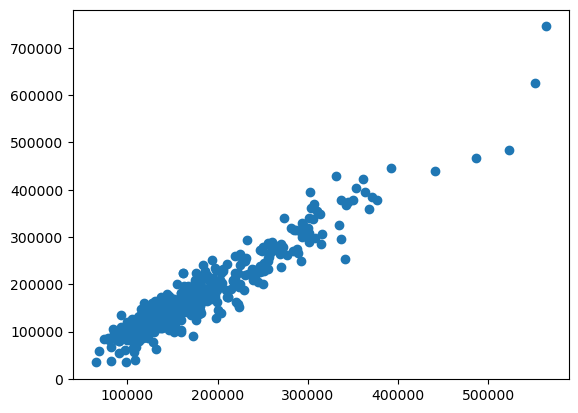

In [47]:
plt.scatter(y_pred_red, y_test)

In [48]:
sum(y_train > 400000) / len(y_train)

0.018590998043052837

In [49]:
X_train_red

OverallQual  GarageCars  GrLivArea  TotalBsmtSF  BsmtFinSF1
0               7           2       1411         1386         822
1               7           2       2062         1157        1065
2               5           2       1065         1065           0
3               6           2       2345          952         503
4               3           0       1306          728           0
...           ...         ...        ...          ...         ...
1017            6           2       1350         1064           0
1018            5           1       1063         1056         354
1019            6           0       1355          684           0
1020            6           1        987          483         358
1021            3           3        894          894           0

[1022 rows x 5 columns]

In [50]:
user_input = X_train_red.head(1)

In [51]:
user_input

OverallQual  GarageCars  GrLivArea  TotalBsmtSF  BsmtFinSF1
0            7           2       1411         1386         822

In [52]:
predicted_Value = model_red.predict(user_input).item()

In [53]:
(0.8 * user_input["TotalBsmtSF"].item())

1108.8

In [54]:
user_input["BsmtFinSF1"].item()

822

In [55]:
user_input["BsmtFinSF1"].item() < (0.8 * user_input["TotalBsmtSF"].item())

True

In [56]:
if user_input["BsmtFinSF1"].item() < (0.8 * user_input["TotalBsmtSF"].item()):
    user_input_ext = user_input.copy()
    user_input_ext["BsmtFinSF1"] = user_input_ext["TotalBsmtSF"] *0.8
    Improvementpot = model_red.predict(user_input_ext).item() - predicted_Value
    Improvementpot

In [57]:
Improvementpot

42170.87999999999

In [78]:
user_input_ext = pd.DataFrame({
    "OverallQual": user_input["OverallQual"] + 1,
    "GrLivArea": user_input["GrLivArea"] * 1.1,
    "GarageCars": user_input["GarageCars"]  + 1,
    "TotalBsmtSF": user_input["TotalBsmtSF"] * 1.1,
    "BsmtFinSF1": user_input["BsmtFinSF1"] * 1.1
})

KeyError: 'BsmtFinSF1'

In [58]:
model_red.predict(user_input_ext).item()

169303.18

In [69]:
user_input_ext = user_input.copy()
user_input_ext_combined = user_input.copy()
step_increment = ["OverallQual", "GarageCars"]
perct_increment = ["GrLivArea", "TotalBsmtSF", "BsmtFinSF1"]
predictions = pd.DataFrame({
    "improvement": [],
    "potential": []
})
prev = model_red.predict(user_input).item()
for s in step_increment:
    user_input_ext[s] = user_input_ext[s] + 1
    user_input_ext_combined[s] = user_input_ext_combined[s] + 1
    pred = model_red.predict(user_input_ext).item()
    append = pd.DataFrame(
    {
        "improvement": [s],
        "potential": [pred - prev]
    })
    user_input_ext = user_input.copy()
    predictions = pd.concat([predictions, append])
combined = pd.DataFrame(
    {
    "improvement": ["combined"],
    "potential": [model_red.predict(user_input_ext_combined).item() - prev]
    })
predictions = pd.concat([predictions, combined])

NameError: name 'combined' is not defined

In [70]:
predictions

improvement  potential
0  OverallQual  108762.90
0   GarageCars   33127.20
0     combined  127194.84

In [ ]:
x=3.55

In [ ]:
x.round()

In [ ]:
round(x)

In [ ]:
#pickle.dump(reg_red, open('model_red.pkl', 'wb'))

In [ ]:
##Descriptive Analysis 2.0 Fokus on imp top 5

In [ ]:
imp

In [70]:
df = pd.read_csv("/Users/noahjakel/Business Analytics/train.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/Users/noahjakel/Business Analytics/train.csv'

In [71]:
imp.head(5)["names"]

4     OverallQual
16      GrLivArea
12    TotalBsmtSF
26     GarageCars
13       1stFlrSF
Name: names, dtype: object

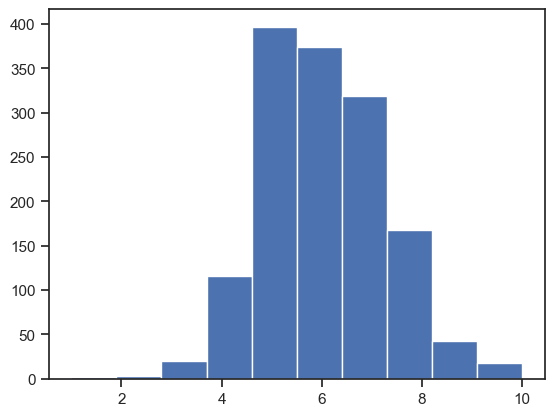

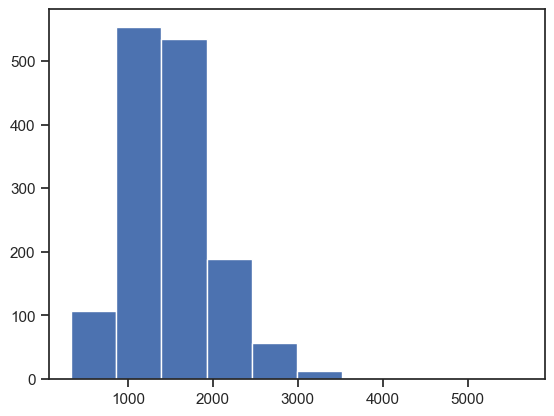

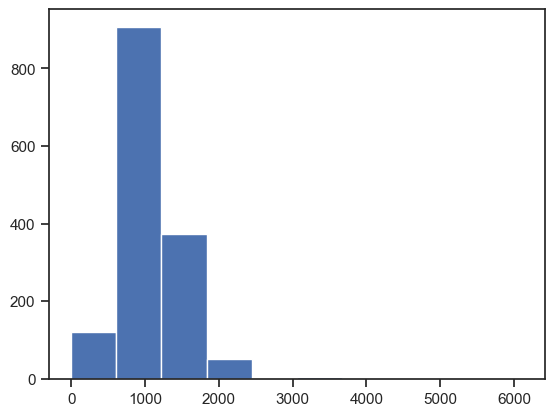

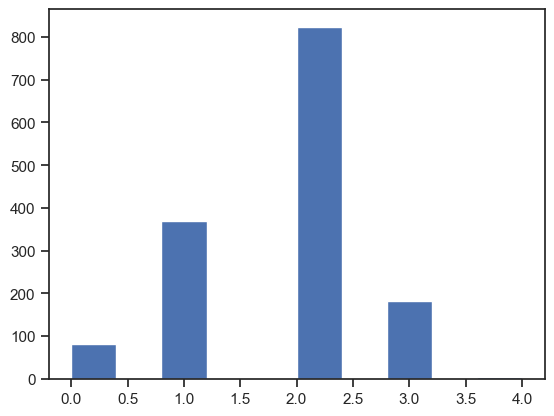

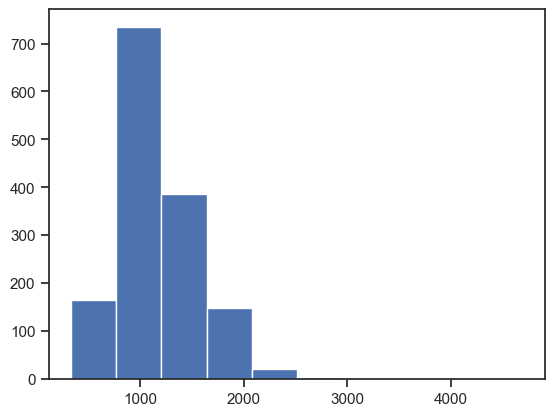

In [72]:
for x in imp.head(5)["names"]:
    plt.figure()
    plt.hist(df[x])

In [73]:
ax.hist(df["OverallQual"])

(array([  2.,   3.,  20., 116., 397., 374., 319., 168.,  43.,  18.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

In [114]:
user = 7
x = df.loc[df["OverallQual"] != user, "OverallQual"]
Xi = df.loc[df["OverallQual"] == user, "OverallQual"]

(array([  0.,   0.,   0.,   0.,   0., 319.,   0.,   0.,   0.,   0.]),
 array([6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5]),
 <BarContainer object of 10 artists>)

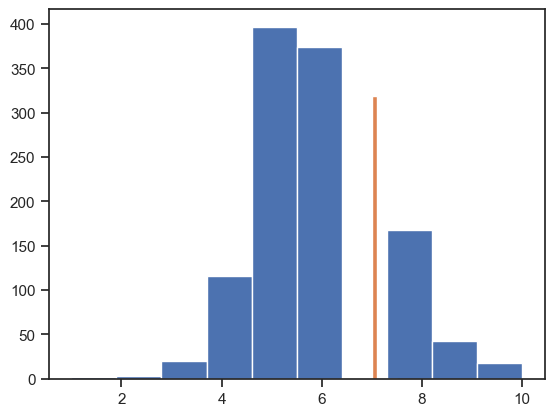

In [75]:
fig, ax = plt.subplots(1,1)
ax.hist(x)
ax.hist(Xi)

In [72]:
import plotly.express as px
fig = px.histogram(df, x=x, color_discrete_sequence=['indianred'])
fig.show()

In [115]:
xi = x.unique().tolist()
yi = 6

In [116]:
xi.remove(yi)

In [117]:
xi

[8, 5, 9, 4, 10, 3, 1, 2]

In [85]:
dicts = {}
keys = xi
z = "blue"
for i in keys:
        dicts[i] = x
dicts[yi] = "green"
print(dicts)

{8: 'blue', 5: 'blue', 9: 'blue', 4: 'blue', 10: 'blue', 3: 'blue', 1: 'blue', 2: 'blue', 6: 'green'}


In [89]:
fig = px.histogram(df, x=x, color=x, 
color_discrete_map=dicts)
#fig.update_layout()
fig.show()

In [93]:
from threading import Event


In [100]:
#x = 1
x = "str"

In [103]:
try:
    print(x+2)
except:
  ()

In [105]:
keys = df["OverallQual"].unique().tolist()

In [132]:
c = {}
z = "blue"
try: 
    yi = user_input["OverallQual"].item()
    keys = df["OverallQual"].unique().tolist()
    keys.remove(yi)
    dicts[yi] = "green"
except:
    keys = df["OverallQual"].unique().tolist()
for i in keys:
    dicts[i] = z
fig = px.histogram(df, x=x, color=x, 
color_discrete_map=dicts)
#fig.update_layout()
fig.show()

In [126]:
keys

In [127]:
yi

6

In [128]:
zz = df["OverallQual"].unique().tolist()

In [129]:
zz

[7, 6, 8, 5, 9, 4, 10, 3, 1, 2]

In [130]:
print(zz.remove(6))

None


In [131]:
zz

[7, 8, 5, 9, 4, 10, 3, 1, 2]

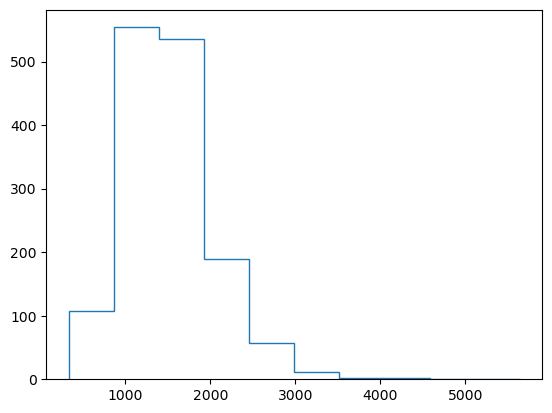

In [137]:
x = df["GrLivArea"]
counts, bins = np.histogram(x)
plt.stairs(counts, bins)

In [143]:
range(len(counts))

range(0, 10)

In [144]:
range(len(bins))

range(0, 11)

In [151]:
start = pd.DataFrame(
{
    "bins": [],
    "count": []
})
for i in range(len(counts)):
    append = pd.DataFrame(
    {
        "bins": [bins[i]],
        "count": [counts[i]]
    })
    start = pd.concat([start, append])

In [160]:
start = start.astype("int")
start

bins  count
0   334    107
0   864    554
0  1395    535
0  1926    189
0  2457     57
0  2988     12
0  3518      2
0  4049      2
0  4580      1
0  5111      1

In [161]:

fig = px.bar(start, x='bins', y='count', color = start['bins'],
            color_discrete_map = {864: "red"})
fig.show()

In [163]:
fig = px.histogram(df, x="GrLivArea")
#fig.update_layout()
fig.show()

In [165]:
px.histogram?

In [166]:
bins

array([ 334. ,  864.8, 1395.6, 1926.4, 2457.2, 2988. , 3518.8, 4049.6,
       4580.4, 5111.2, 5642. ])

In [168]:
list_of_bins = []
list_of_bins.append(3)

In [169]:
##customizing histogram in plotly
i = 399
list_of_bins = []
while i < 5700:
    list_of_bins.append(i)
    i += 100

In [192]:
data = df["GrLivArea"]
data[1]

1262

In [186]:
check =[]
for i in range(len(list_of_bins)):
    check.append(list_of_bins[i])

In [226]:
data = np.where(data < list_of_bins[0], list_of_bins[0], data)
for i in range(len(list_of_bins)):
    data = np.where((data < list_of_bins[i]) & (data > list_of_bins[i-1]), list_of_bins[i], data)

In [232]:
data = pd.DataFrame(data)
np.unique(data[0])

array([ 399,  499,  599,  699,  799,  899,  999, 1099, 1199, 1299, 1399,
       1499, 1599, 1699, 1799, 1899, 1999, 2099, 2199, 2299, 2399, 2499,
       2599, 2699, 2799, 2899, 2999, 3099, 3199, 3299, 3399, 3499, 3699,
       4399, 4499, 4699, 5699])

In [208]:
len(list_of_bins)

54

In [210]:
fig = px.histogram(data, x=0)
#fig.update_layout()
fig.show()

In [218]:
user_input["GrLivArea"]

0    1411
Name: GrLivArea, dtype: int64

In [223]:
for i in range(len(list_of_bins)):
    if (user_input["GrLivArea"].item() < list_of_bins[i]) & (user_input["GrLivArea"].item() > list_of_bins[i-1]):
        user_input["GrLivArea"] = list_of_bins[i].copy()

In [224]:
user_input

OverallQual  GarageCars  GrLivArea  TotalBsmtSF  BsmtFinSF1
0            7           2       1499         1386         822

In [225]:
for i in range(len(list_of_bins)):
    if (user_input["GrLivArea"].item() < list_of_bins[i]) & (user_input["GrLivArea"].item() > list_of_bins[i-1]):
        user_input["GrLivArea"] = list_of_bins[i].copy()
c = {}
z = "blue"
try: 
    yi = user_input["GrLivArea"].item()
    keys = data[0].unique().tolist()
    keys.remove(yi)
    dicts[yi] = "green"
except:
    keys = data[0].unique().tolist()
for i in keys:
    dicts[i] = z
fig = px.histogram(data, x=0, color=data[0], 
color_discrete_map=dicts)
#fig.update_layout()
fig.show()

In [216]:
x

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1460, dtype: int64

In [237]:
data = df["GrLivArea"]
data = pd.DataFrame(data)
i = 399
list_of_bins = []
while i < 5700:
    list_of_bins.append(i)
    i += 100
data = np.where(data < list_of_bins[0], list_of_bins[0], data)
for i in range(len(list_of_bins)):
    data = np.where((data < list_of_bins[i]) & (data > list_of_bins[i-1]), list_of_bins[i], data)
for i in range(len(list_of_bins)):
    if (user_input["GrLivArea"].item() < list_of_bins[i]) & (user_input["GrLivArea"].item() > list_of_bins[i-1]):
        user_input["GrLivArea"] = list_of_bins[i]
c = {}
z = "blue"
try: 
    yi = user_input["GrLivArea"].item()
    keys = np.unique(data).tolist()
    keys.remove(yi)
    c[yi] = "green"
except:
    keys = np.unique(data).tolist()
for i in keys:
    c[i] = z
data = pd.DataFrame(data)
fig = px.histogram(data, x=0, color=data[0], 
color_discrete_map=c)
#fig.update_layout()
fig.show()
print(c)

{1499: 'green', 399: 'blue', 499: 'blue', 599: 'blue', 699: 'blue', 799: 'blue', 899: 'blue', 999: 'blue', 1099: 'blue', 1199: 'blue', 1299: 'blue', 1399: 'blue', 1599: 'blue', 1699: 'blue', 1799: 'blue', 1899: 'blue', 1999: 'blue', 2099: 'blue', 2199: 'blue', 2299: 'blue', 2399: 'blue', 2499: 'blue', 2599: 'blue', 2699: 'blue', 2799: 'blue', 2899: 'blue', 2999: 'blue', 3099: 'blue', 3199: 'blue', 3299: 'blue', 3399: 'blue', 3499: 'blue', 3699: 'blue', 4399: 'blue', 4499: 'blue', 4699: 'blue', 5699: 'blue'}


In [234]:
keys

[1799]

In [254]:
fig = px.histogram(df, x="BsmtFinSF1")
#fig.update_layout()
fig.show()

In [244]:
data = df["TotalBsmtSF"].loc[df["TotalBsmtSF"]< 4000]

In [245]:
data.max()

3206

In [252]:
i = 0
list_of_bins = []
while i < 3251:
    list_of_bins.append(i)
    i += 50

In [ ]:
data = df["TotalBsmtSF"].loc[df["TotalBsmtSF"]< 4000]
data = pd.DataFrame(data)
i = 0
list_of_bins = []
while i < 3251:
    list_of_bins.append(i)
    i += 50
data = np.where(data < list_of_bins[0], list_of_bins[0], data)
for i in range(len(list_of_bins)):
    data = np.where((data < list_of_bins[i]) & (data > list_of_bins[i-1]), list_of_bins[i], data)
for i in range(len(list_of_bins)):
    if (user_input["TotalBsmtSF"].item() < list_of_bins[i]) & (user_input["TotalBsmtSF"].item() > list_of_bins[i-1]):
        user_input["TotalBsmtSF"] = list_of_bins[i]
c = {}
z = "blue"
try: 
    yi = user_input["TotalBsmtSF"].item()
    keys = np.unique(data).tolist()
    keys.remove(yi)
    c[yi] = "green"
except:
    keys = np.unique(data).tolist()
for i in keys:
    c[i] = z
data = pd.DataFrame(data)
fig = px.histogram(data, x=0, color=data[0], 
color_discrete_map=c)
#fig.update_layout()
fig.show()
print(c)